In [1]:
import csv
import pandas as pd
import numpy as np
# data1 = pd.read_csv('/Users/karasu/Documents/KyushuUniv/Rakuten/purchase_dataset/2019_20_35.csv')
data5 = pd.read_csv('/Users/karasu/Documents/KyushuUniv/Rakuten/purchase_dataset/2020_20_35.csv')
data6 = pd.read_csv('/Users/karasu/Documents/KyushuUniv/Rakuten/purchase_dataset/2020_35_50.csv')
data7 = pd.read_csv('/Users/karasu/Documents/KyushuUniv/Rakuten/purchase_dataset/2020_50_65.csv')
data8 = pd.read_csv('/Users/karasu/Documents/KyushuUniv/Rakuten/purchase_dataset/2020_65_80.csv')

In [2]:
#gender mapping
gender_mapping = {'f':1, 'm':2, 'u':0}
data5['user_gender'] = data5['user_gender'].map(gender_mapping)

In [3]:
data5=data5

In [4]:
# #price mapping
price_mapping = {'(0, 1000]':1, '(1000, 2000]':2, '(2000, 3000]':3,'(3000, 4000]':4, '(4000, 5000]':5,'(5000, 6000]':6, '(6000, 7000]':7, '(7000, 8000]':8, '(8000, 9000]':9, '(9000, 10000]':10, '(10000, 20000]':11, '(20000, 30000]':12, '(30000, 40000]':13, '(40000, 50000]':14, '(50000, 60000]':15, '(60000, 70000]':16, '(70000, 80000]':17, '(80000, 90000]':18, '(90000, 100000]':19, '(100000, 200000]':20, '(200000, 300000]':21, '(300000, 400000]':22,'(400000, 500000]':23, '(500000, 600000]':24,'(600000, 700000]':25, '(700000, 800000]':26,'(800000, 900000]':27, '(900000, 1000000]':28, '(1000000, 2000000]':29}
data5['price'] = data5['price'].map(price_mapping)

In [5]:
data5=data5

In [6]:
#region mapping
region_mapping = {'関東':1, '近畿':2, '中部':3, '九州':4, '東北':5, '中国':6, '北海道':7, '四国':8, '沖縄':9}
data5['user_region'] = data5['user_region'].map(region_mapping)

In [7]:
data5=data5

In [8]:
# print(data5)
#age mapping
age_mapping = {'(20, 35]':2035}
data5['user_age'] = data5['user_age'].map(age_mapping)

In [9]:
data5=data5

In [10]:
genre5=data5['genre_name_all'].str.split('>>', expand = True)
genre5.columns =['top', 'middle', 'bottom']

In [11]:
frames = [data5, genre5]
result5 = pd.concat(frames,axis=1)
result5 = result5.drop('genre_name_all', axis=1)

In [12]:
result5.drop('middle', inplace=True, axis=1)

In [13]:
result5.drop('bottom', inplace=True, axis=1)

In [14]:
# print(result5)

In [15]:
revise5=result5

In [16]:
revise5

,week,user_gender,user_age,user_region,price,top
0,1,2,2035,1,1,本・雑誌・コミック
1,1,1,2035,5,3,日用品雑貨・文房具・手芸
2,1,2,2035,1,12,靴
3,1,2,2035,7,7,メンズファッション
4,1,2,2035,1,6,車用品・バイク用品
...,...,...,...,...,...,...
1927876,53,2,2035,2,2,キッチン用品・食器・調理器具
1927877,53,1,2035,2,2,パソコン・周辺機器
1927878,53,2,2035,3,4,花・ガーデン・DIY
1927879,53,1,2035,8,11,医薬品・コンタクト・介護


In [17]:
r5 = revise5.copy()
print (r5['top'].unique())

['本・雑誌・コミック ' '日用品雑貨・文房具・手芸 ' '靴 ' 'メンズファッション ' '車用品・バイク用品 '
 'キッズ・ベビー・マタニティ ' '家電 ' 'インナー・下着・ナイトウェア ' '美容・コスメ・香水 ' 'インテリア・寝具・収納 '
 'スポーツ・アウトドア ' 'おもちゃ ' 'テレビゲーム ' 'ビール・洋酒 ' 'バッグ・小物・ブランド雑貨 ' 'ダイエット・健康 '
 'キッチン用品・食器・調理器具 ' 'CD・DVD ' '食品 ' 'ペット・ペットグッズ ' '水・ソフトドリンク '
 'スマートフォン・タブレット ' '医薬品・コンタクト・介護 ' 'パソコン・周辺機器 ' 'レディースファッション ' 'ホビー '
 'スイーツ・お菓子 ' 'ジュエリー・アクセサリー ' '楽器・音響機器 ' 'TV・オーディオ・カメラ ' '花・ガーデン・DIY '
 'カタログギフト・チケット ' 'サービス・リフォーム ' '腕時計 ' '光回線・モバイル通信 ' '日本酒・焼酎 ' '車・バイク '
 'デジタルコンテンツ ']


In [18]:
top_mapping = {'美容・コスメ・香水':1, '日用品雑貨・文房具・手芸':2, '本・雑誌・コミック':3, 'キッズ・ベビー・マタニティ':4, '医薬品・コンタクト・介護':5, '食品':6, 'インテリア・寝具・収納':7, 'スポーツ・アウトドア':8, 'キッチン用品・食器・調理器具':9, 'レディースファッション':10, 'スマートフォン・タブレット':11, '家電':12, 'バッグ・小物・ブランド雑貨':13, 'ダイエット・健康':14, 'インナー・下着・ナイトウェア':15, 'スイーツ・お菓子':16, '水・ソフトドリンク':17, 'ペット・ペットグッズ':18, '花・ガーデン・DIY':19, 'ホビー':20, '靴':21, 'メンズファッション':22, 'CD・DVD':23, 'おもちゃ':24, '車用品・バイク用品':25, 'ジュエリー・アクセサリー':26, 'パソコン・周辺機器':27, 'TV・オーディオ・カメラ':28, 'テレビゲーム':29, 'ビール・洋酒':30, '腕時計':31, '日本酒・焼酎':32, '楽器・音響機器':33, 'サービス・リフォーム':34, 'カタログギフト・チケット':35 ,'光回線・モバイル通信':36, '車・バイク':37, 'デジタルコンテンツ':38}
r5['top'] = r5['top'].str.strip().map(top_mapping)

In [19]:
r5

,week,user_gender,user_age,user_region,price,top
0,1,2,2035,1,1,3
1,1,1,2035,5,3,2
2,1,2,2035,1,12,21
3,1,2,2035,7,7,22
4,1,2,2035,1,6,25
...,...,...,...,...,...,...
1927876,53,2,2035,2,2,9
1927877,53,1,2035,2,2,27
1927878,53,2,2035,3,4,19
1927879,53,1,2035,8,11,5


In [20]:
re5 = r5.drop('user_age', axis=1)

In [21]:
print(re5)

         week  user_gender  user_region  price  top
0           1            2            1      1    3
1           1            1            5      3    2
2           1            2            1     12   21
3           1            2            7      7   22
4           1            2            1      6   25
...       ...          ...          ...    ...  ...
1927876    53            2            2      2    9
1927877    53            1            2      2   27
1927878    53            2            3      4   19
1927879    53            1            8     11    5
1927880    53            1            3      5    6

[1927881 rows x 5 columns]


### r5_ with user_age, re5 without user_age

In [22]:
# re5.to_csv('/Users/karasu/Documents/KyushuUniv/Rakuten/purchase_dataset/20202035clean.csv')

## 35-50

In [30]:
#gender mapping
gender_mapping = {'f':1, 'm':2, 'u':0}
data6['user_gender'] = data6['user_gender'].map(gender_mapping)
data6=data6

In [31]:
# #price mapping
price_mapping = {'(0, 1000]':1, '(1000, 2000]':2, '(2000, 3000]':3,'(3000, 4000]':4, '(4000, 5000]':5,'(5000, 6000]':6, '(6000, 7000]':7, '(7000, 8000]':8, '(8000, 9000]':9, '(9000, 10000]':10, '(10000, 20000]':11, '(20000, 30000]':12, '(30000, 40000]':13, '(40000, 50000]':14, '(50000, 60000]':15, '(60000, 70000]':16, '(70000, 80000]':17, '(80000, 90000]':18, '(90000, 100000]':19, '(100000, 200000]':20, '(200000, 300000]':21, '(300000, 400000]':22,'(400000, 500000]':23, '(500000, 600000]':24,'(600000, 700000]':25, '(700000, 800000]':26,'(800000, 900000]':27, '(900000, 1000000]':28, '(1000000, 2000000]':29}
data6['price'] = data6['price'].map(price_mapping)
data6=data6

In [32]:
#region mapping
region_mapping = {'関東':1, '近畿':2, '中部':3, '九州':4, '東北':5, '中国':6, '北海道':7, '四国':8, '沖縄':9}
data6['user_region'] = data6['user_region'].map(region_mapping)
data6=data6

In [33]:
#age mapping
age_mapping = {'(35, 50]':3550}
data6['user_age'] = data6['user_age'].map(age_mapping)
data6=data6

In [35]:
genre6=data6['genre_name_all'].str.split('>>', expand = True)
genre6.columns =['top', 'middle', 'bottom']
frames = [data6, genre6]
result6 = pd.concat(frames,axis=1)
result6 = result6.drop('genre_name_all', axis=1)

In [38]:
result6.drop('middle', inplace=True, axis=1)
result6.drop('bottom', inplace=True, axis=1)

In [44]:
revise6=result6
r6 = revise6.copy()
print (r6['top'].unique())

['テレビゲーム ' 'CD・DVD ' '本・雑誌・コミック ' 'インテリア・寝具・収納 ' '日用品雑貨・文房具・手芸 '
 '医薬品・コンタクト・介護 ' 'ペット・ペットグッズ ' 'スポーツ・アウトドア ' 'パソコン・周辺機器 ' '美容・コスメ・香水 '
 'キッズ・ベビー・マタニティ ' '家電 ' 'スイーツ・お菓子 ' 'インナー・下着・ナイトウェア ' 'ホビー ' '車用品・バイク用品 '
 '水・ソフトドリンク ' 'メンズファッション ' 'バッグ・小物・ブランド雑貨 ' 'TV・オーディオ・カメラ ' '靴 ' '食品 '
 'スマートフォン・タブレット ' 'ダイエット・健康 ' '花・ガーデン・DIY ' 'レディースファッション ' 'おもちゃ '
 'ビール・洋酒 ' 'サービス・リフォーム ' 'キッチン用品・食器・調理器具 ' '楽器・音響機器 ' '日本酒・焼酎 '
 'ジュエリー・アクセサリー ' '腕時計 ' 'カタログギフト・チケット ' '光回線・モバイル通信 ' 'デジタルコンテンツ '
 '車・バイク ']


In [45]:
top_mapping = {'美容・コスメ・香水':1, '日用品雑貨・文房具・手芸':2, '本・雑誌・コミック':3, 'キッズ・ベビー・マタニティ':4, '医薬品・コンタクト・介護':5, '食品':6, 'インテリア・寝具・収納':7, 'スポーツ・アウトドア':8, 'キッチン用品・食器・調理器具':9, 'レディースファッション':10, 'スマートフォン・タブレット':11, '家電':12, 'バッグ・小物・ブランド雑貨':13, 'ダイエット・健康':14, 'インナー・下着・ナイトウェア':15, 'スイーツ・お菓子':16, '水・ソフトドリンク':17, 'ペット・ペットグッズ':18, '花・ガーデン・DIY':19, 'ホビー':20, '靴':21, 'メンズファッション':22, 'CD・DVD':23, 'おもちゃ':24, '車用品・バイク用品':25, 'ジュエリー・アクセサリー':26, 'パソコン・周辺機器':27, 'TV・オーディオ・カメラ':28, 'テレビゲーム':29, 'ビール・洋酒':30, '腕時計':31, '日本酒・焼酎':32, '楽器・音響機器':33, 'サービス・リフォーム':34, 'カタログギフト・チケット':35 ,'光回線・モバイル通信':36, '車・バイク':37, 'デジタルコンテンツ':38}
r6['top'] = r6['top'].str.strip().map(top_mapping)
re6 = r6.drop('user_age', axis=1)
print(re6)

         week  user_gender  user_region  price  top
0           1            2            6   13.0   29
1           1            1            4    5.0   23
2           1            1            2    1.0    3
3           1            2            5   12.0   29
4           1            1            3    4.0    7
...       ...          ...          ...    ...  ...
2577563    53            0            1    4.0    6
2577564    53            1            8    4.0    7
2577565    53            1            3    5.0    2
2577566    53            1            1    1.0    9
2577567    53            1            4    3.0    9

[2577568 rows x 5 columns]


In [46]:
re6.to_csv('/Users/karasu/Documents/KyushuUniv/Rakuten/purchase_dataset/20203550clean.csv')

## 50-65

In [72]:
#gender mapping
gender_mapping = {'f':1, 'm':2, 'u':0}
data7['user_gender'] = data7['user_gender'].map(gender_mapping)
data7=data7

In [73]:
# #price mapping
price_mapping = {'(0, 1000]':1, '(1000, 2000]':2, '(2000, 3000]':3,'(3000, 4000]':4, '(4000, 5000]':5,'(5000, 6000]':6, '(6000, 7000]':7, '(7000, 8000]':8, '(8000, 9000]':9, '(9000, 10000]':10, '(10000, 20000]':11, '(20000, 30000]':12, '(30000, 40000]':13, '(40000, 50000]':14, '(50000, 60000]':15, '(60000, 70000]':16, '(70000, 80000]':17, '(80000, 90000]':18, '(90000, 100000]':19, '(100000, 200000]':20, '(200000, 300000]':21, '(300000, 400000]':22,'(400000, 500000]':23, '(500000, 600000]':24,'(600000, 700000]':25, '(700000, 800000]':26,'(800000, 900000]':27, '(900000, 1000000]':28, '(1000000, 2000000]':29}
data7['price'] = data7['price'].map(price_mapping)
data7=data7

In [74]:
#region mapping
region_mapping = {'関東':1, '近畿':2, '中部':3, '九州':4, '東北':5, '中国':6, '北海道':7, '四国':8, '沖縄':9}
data7['user_region'] = data7['user_region'].map(region_mapping)
data7=data7

In [75]:
#age mapping
age_mapping = {'(50, 65]':5065}
data7['user_age'] = data7['user_age'].map(age_mapping)
data7=data7

In [76]:
genre7=data7['genre_name_all'].str.split('>>', expand = True)
genre7.columns =['top', 'middle', 'bottom']
frames = [data7, genre7]
result7 = pd.concat(frames,axis=1)
result7 = result7.drop('genre_name_all', axis=1)

In [77]:
result7.drop('middle', inplace=True, axis=1)
result7.drop('bottom', inplace=True, axis=1)

In [78]:
revise7=result7
r7 = revise7.copy()
print (r7['top'].unique())

['本・雑誌・コミック ' '食品 ' '医薬品・コンタクト・介護 ' '美容・コスメ・香水 ' '花・ガーデン・DIY '
 'ペット・ペットグッズ ' '家電 ' 'スイーツ・お菓子 ' 'インテリア・寝具・収納 ' 'レディースファッション ' 'CD・DVD '
 'ビール・洋酒 ' 'スポーツ・アウトドア ' '腕時計 ' '日用品雑貨・文房具・手芸 ' 'インナー・下着・ナイトウェア '
 '水・ソフトドリンク ' 'パソコン・周辺機器 ' 'キッチン用品・食器・調理器具 ' 'スマートフォン・タブレット ' 'ダイエット・健康 '
 'サービス・リフォーム ' 'TV・オーディオ・カメラ ' 'バッグ・小物・ブランド雑貨 ' '車用品・バイク用品 ' '靴 '
 'メンズファッション ' 'ジュエリー・アクセサリー ' 'デジタルコンテンツ ' 'ホビー ' 'テレビゲーム ' '楽器・音響機器 '
 'キッズ・ベビー・マタニティ ' '日本酒・焼酎 ' 'おもちゃ ' 'カタログギフト・チケット ' '光回線・モバイル通信 ' '車・バイク ']


In [79]:
top_mapping = {'美容・コスメ・香水':1, '日用品雑貨・文房具・手芸':2, '本・雑誌・コミック':3, 'キッズ・ベビー・マタニティ':4, '医薬品・コンタクト・介護':5, '食品':6, 'インテリア・寝具・収納':7, 'スポーツ・アウトドア':8, 'キッチン用品・食器・調理器具':9, 'レディースファッション':10, 'スマートフォン・タブレット':11, '家電':12, 'バッグ・小物・ブランド雑貨':13, 'ダイエット・健康':14, 'インナー・下着・ナイトウェア':15, 'スイーツ・お菓子':16, '水・ソフトドリンク':17, 'ペット・ペットグッズ':18, '花・ガーデン・DIY':19, 'ホビー':20, '靴':21, 'メンズファッション':22, 'CD・DVD':23, 'おもちゃ':24, '車用品・バイク用品':25, 'ジュエリー・アクセサリー':26, 'パソコン・周辺機器':27, 'TV・オーディオ・カメラ':28, 'テレビゲーム':29, 'ビール・洋酒':30, '腕時計':31, '日本酒・焼酎':32, '楽器・音響機器':33, 'サービス・リフォーム':34, 'カタログギフト・チケット':35 ,'光回線・モバイル通信':36, '車・バイク':37, 'デジタルコンテンツ':38}
r7['top'] = r7['top'].str.strip().map(top_mapping)
re7 = r7.drop('user_age', axis=1)
print(re7)

         week  user_gender  user_region  price  top
0           1            1            3    2.0    3
1           1            1            2    4.0    6
2           1            1            2    2.0    6
3           1            2            1    4.0    5
4           1            1            1    3.0    1
...       ...          ...          ...    ...  ...
1835765    53            1            1    2.0    1
1835766    53            1            1    8.0    7
1835767    53            2            1   12.0    8
1835768    53            2            1    1.0    3
1835769    53            2            5   12.0   22

[1835770 rows x 5 columns]


In [55]:
re7.to_csv('/Users/karasu/Documents/KyushuUniv/Rakuten/purchase_dataset/20205065clean.csv')

## 65-80

In [61]:
#gender mapping
gender_mapping = {'f':1, 'm':2, 'u':0}
data8['user_gender'] = data8['user_gender'].map(gender_mapping)
data8=data8

In [63]:
# #price mapping
price_mapping = {'(0, 1000]':1, '(1000, 2000]':2, '(2000, 3000]':3,'(3000, 4000]':4, '(4000, 5000]':5,'(5000, 6000]':6, '(6000, 7000]':7, '(7000, 8000]':8, '(8000, 9000]':9, '(9000, 10000]':10, '(10000, 20000]':11, '(20000, 30000]':12, '(30000, 40000]':13, '(40000, 50000]':14, '(50000, 60000]':15, '(60000, 70000]':16, '(70000, 80000]':17, '(80000, 90000]':18, '(90000, 100000]':19, '(100000, 200000]':20, '(200000, 300000]':21, '(300000, 400000]':22,'(400000, 500000]':23, '(500000, 600000]':24,'(600000, 700000]':25, '(700000, 800000]':26,'(800000, 900000]':27, '(900000, 1000000]':28, '(1000000, 2000000]':29}
data8['price'] = data8['price'].map(price_mapping)
data8=data8

In [64]:
#region mapping
region_mapping = {'関東':1, '近畿':2, '中部':3, '九州':4, '東北':5, '中国':6, '北海道':7, '四国':8, '沖縄':9}
data8['user_region'] = data8['user_region'].map(region_mapping)
data8=data8

In [65]:
#age mapping
age_mapping = {'(65, 80]':6580}
data8['user_age'] = data8['user_age'].map(age_mapping)
data8=data8

In [66]:
genre8=data8['genre_name_all'].str.split('>>', expand = True)
genre8.columns =['top', 'middle', 'bottom']
frames = [data8, genre8]
result8 = pd.concat(frames,axis=1)
result8 = result8.drop('genre_name_all', axis=1)

In [67]:
result8.drop('middle', inplace=True, axis=1)
result8.drop('bottom', inplace=True, axis=1)

In [68]:
revise8=result8
r8 = revise8.copy()
print (r8['top'].unique())

['食品 ' '本・雑誌・コミック ' '美容・コスメ・香水 ' '水・ソフトドリンク ' 'スポーツ・アウトドア '
 '日用品雑貨・文房具・手芸 ' 'ダイエット・健康 ' 'スマートフォン・タブレット ' 'インナー・下着・ナイトウェア ' 'ホビー '
 'インテリア・寝具・収納 ' '家電 ' 'バッグ・小物・ブランド雑貨 ' 'ペット・ペットグッズ ' 'CD・DVD '
 'TV・オーディオ・カメラ ' '靴 ' 'スイーツ・お菓子 ' '医薬品・コンタクト・介護 ' 'キッチン用品・食器・調理器具 '
 '花・ガーデン・DIY ' 'キッズ・ベビー・マタニティ ' 'ビール・洋酒 ' 'ジュエリー・アクセサリー ' 'パソコン・周辺機器 '
 'レディースファッション ' '車用品・バイク用品 ' 'テレビゲーム ' 'メンズファッション ' '日本酒・焼酎 ' '楽器・音響機器 '
 'おもちゃ ' 'サービス・リフォーム ' '腕時計 ' 'カタログギフト・チケット ' '車・バイク ' '光回線・モバイル通信 '
 'デジタルコンテンツ ']


In [69]:
top_mapping = {'美容・コスメ・香水':1, '日用品雑貨・文房具・手芸':2, '本・雑誌・コミック':3, 'キッズ・ベビー・マタニティ':4, '医薬品・コンタクト・介護':5, '食品':6, 'インテリア・寝具・収納':7, 'スポーツ・アウトドア':8, 'キッチン用品・食器・調理器具':9, 'レディースファッション':10, 'スマートフォン・タブレット':11, '家電':12, 'バッグ・小物・ブランド雑貨':13, 'ダイエット・健康':14, 'インナー・下着・ナイトウェア':15, 'スイーツ・お菓子':16, '水・ソフトドリンク':17, 'ペット・ペットグッズ':18, '花・ガーデン・DIY':19, 'ホビー':20, '靴':21, 'メンズファッション':22, 'CD・DVD':23, 'おもちゃ':24, '車用品・バイク用品':25, 'ジュエリー・アクセサリー':26, 'パソコン・周辺機器':27, 'TV・オーディオ・カメラ':28, 'テレビゲーム':29, 'ビール・洋酒':30, '腕時計':31, '日本酒・焼酎':32, '楽器・音響機器':33, 'サービス・リフォーム':34, 'カタログギフト・チケット':35 ,'光回線・モバイル通信':36, '車・バイク':37, 'デジタルコンテンツ':38}
r8['top'] = r7['top'].str.strip().map(top_mapping)
re8 = r8.drop('user_age', axis=1)
print(re8)

         week  user_gender  user_region  price  top
0           1            2            2      1    3
1           1            2            1      1    6
2           1            2            1      2    6
3           1            2            1      3    5
4           1            1            1      3    1
...       ...          ...          ...    ...  ...
1065453    53            1            6      3   14
1065454    53            2            3     11   12
1065455    53            2            1      5    5
1065456    53            2            2      3    5
1065457    53            2            1      4   26

[1065458 rows x 5 columns]


In [70]:
re8.to_csv('/Users/karasu/Documents/KyushuUniv/Rakuten/purchase_dataset/20206580clean.csv')

In [28]:
# #gender mapping
# gender_mapping = {'f':1, 'm':2, 'u':0}
# data6['user_gender'] = data6['user_gender'].map(gender_mapping)
# data6=data6
# # #price mapping
# price_mapping = {'(0, 1000]':1, '(1000, 2000]':2, '(2000, 3000]':3,'(3000, 4000]':4, '(4000, 5000]':5,'(5000, 6000]':6, '(6000, 7000]':7, '(7000, 8000]':8, '(8000, 9000]':9, '(9000, 10000]':10, '(10000, 20000]':11, '(20000, 30000]':12, '(30000, 40000]':13, '(40000, 50000]':14, '(50000, 60000]':15, '(60000, 70000]':16, '(70000, 80000]':17, '(80000, 90000]':18, '(90000, 100000]':19, '(100000, 200000]':20, '(200000, 300000]':21, '(300000, 400000]':22,'(400000, 500000]':23, '(500000, 600000]':24,'(600000, 700000]':25, '(700000, 800000]':26,'(800000, 900000]':27, '(900000, 1000000]':28, '(1000000, 2000000]':29}
# data6['price'] = data6['price'].map(price_mapping)
# data6=data6
# #region mapping
# region_mapping = {'関東':1, '近畿':2, '中部':3, '九州':4, '東北':5, '中国':6, '北海道':7, '四国':8, '沖縄':9}
# data6['user_region'] = data6['user_region'].map(region_mapping)
# data6=data6
# #age mapping
# age_mapping = {'(35, 50]':3550}
# data6['user_age'] = data6['user_age'].map(age_mapping)
# data6=data6
# genre6=data6['genre_name_all'].str.split('>>', expand = True)
# genre6.columns =['top', 'middle', 'bottom']
# frames = [data6, genre6]
# result6 = pd.concat(frames,axis=1)
# result6 = result6.drop('genre_name_all', axis=1)
# result6.drop('middle', inplace=True, axis=1)
# result6.drop('bottom', inplace=True, axis=1)
# revise6=result6
# r6 = revise6.copy()
# print (r6['top'].unique())

# top_mapping = {'美容・コスメ・香水':1, '日用品雑貨・文房具・手芸':2, '本・雑誌・コミック':3, 'キッズ・ベビー・マタニティ':4, '医薬品・コンタクト・介護':5, '食品':6, 'インテリア・寝具・収納':7, 'スポーツ・アウトドア':8, 'キッチン用品・食器・調理器具':9, 'レディースファッション':10, 'スマートフォン・タブレット':11, '家電':12, 'バッグ・小物・ブランド雑貨':13, 'ダイエット・健康':14, 'インナー・下着・ナイトウェア':15, 'スイーツ・お菓子':16, '水・ソフトドリンク':17, 'ペット・ペットグッズ':18, '花・ガーデン・DIY':19, 'ホビー':20, '靴':21, 'メンズファッション':22, 'CD・DVD':23, 'おもちゃ':24, '車用品・バイク用品':25, 'ジュエリー・アクセサリー':26, 'パソコン・周辺機器':27, 'TV・オーディオ・カメラ':28, 'テレビゲーム':29, 'ビール・洋酒':30, '腕時計':31, '日本酒・焼酎':32, '楽器・音響機器':33, 'サービス・リフォーム':34, 'カタログギフト・チケット':35 ,'光回線・モバイル通信':36, '車・バイク':37, 'デジタルコンテンツ':38}
# r6['top'] = r6['top'].str.strip().map(top_mapping)

# r6
# re6 = r6.drop('user_age', axis=1)
# print(re6)

# re6.to_csv('/Users/karasu/Documents/KyushuUniv/Rakuten/purchase_dataset/20203550clean.csv')

In [85]:
frames = [r5,r6,r7,r8]
result = pd.concat(frames,axis=0)

In [87]:
result.to_csv('/Users/karasu/Documents/KyushuUniv/Rakuten/2020totalclean.csv')

In [88]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_iris

In [147]:
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(re5)
# result_cluster=result_new.insert(result_new.columns.get_loc("week"), "cluster", clusters)
# # result_new.head(100)

In [148]:
clusters

array([3, 3, 9, ..., 1, 5, 5], dtype=int32)

In [149]:
clusters is kmeans.labels_

True

In [150]:
kmeans.cluster_centers_

array([[ 7.00000000e+00,  2.08191981e+01,  1.37862978e+00,
         2.61795994e+00,  4.17431222e+00,  2.11401395e+01],
       [ 6.00000000e+00,  4.71029056e+01,  1.29948733e+00,
         2.65821376e+00,  4.06445517e+00,  1.40707227e+01],
       [-5.05195885e-12,  2.72214921e+01,  1.26880463e+00,
         2.65824919e+00,  3.34555150e+00,  5.00112518e+00],
       [ 9.00000000e+00,  6.88016359e+00,  1.25914433e+00,
         2.68384909e+00,  3.18121522e+00,  4.60203622e+00],
       [ 5.00017744e+00,  4.50516796e+01,  1.47077220e+00,
         2.70542636e+00,  5.47163722e+00,  2.55580508e+01],
       [ 1.00000000e+00,  4.84423845e+01,  1.30655806e+00,
         2.64467045e+00,  3.90446202e+00,  4.18194945e+00],
       [ 8.00000000e+00,  3.79546003e+01,  1.26755099e+00,
         2.63854356e+00,  3.27878093e+00,  4.58094203e+00],
       [ 3.00000000e+00,  3.29637180e+01,  1.33803807e+00,
         2.64882370e+00,  4.11802565e+00,  1.72702994e+01],
       [ 4.00000000e+00,  1.72866999e+01,  1.276

In [151]:
kmeans.transform(re5)
#the euclidean distance between each instance and each centroid:

array([[27.18355064, 47.64105459, 27.95276724, ..., 35.69593271,
        17.43609412, 19.02333854],
       [27.75503622, 47.82140704, 27.98658351, ..., 36.02434725,
        17.51009118, 19.69591094],
       [21.95599089, 47.49427388, 32.02677875, ..., 33.19446142,
        24.40072044, 10.51674147],
       ...,
       [32.27610029,  7.7256189 , 29.9596347 , ..., 20.34747916,
        38.34730127, 45.51535489],
       [37.5207655 , 14.79120981, 27.43590007, ..., 25.14207175,
        37.03304773, 48.2032524 ],
       [36.08045054, 11.22470675, 25.8738376 , ..., 23.09735305,
        35.88650626, 47.16173151]])

In [154]:
re5

,week,user_gender,user_region,price,top
0,1,2,1,1,3
1,1,1,5,3,2
2,1,2,1,12,21
3,1,2,7,7,22
4,1,2,1,6,25
...,...,...,...,...,...
1927876,53,2,2,2,9
1927877,53,1,2,2,27
1927878,53,2,3,4,19
1927879,53,1,8,11,5


In [153]:
re5=re5.drop('clusters',axis=1)

In [155]:
re5cluster=re5.insert(re5.columns.get_loc("week"), "clusters", clusters)

In [156]:
re5

,clusters,week,user_gender,user_region,price,top
0,3,1,2,1,1,3
1,3,1,1,5,3,2
2,9,1,2,1,12,21
3,9,1,2,7,7,22
4,9,1,2,1,6,25
...,...,...,...,...,...,...
1927876,5,53,2,2,2,9
1927877,4,53,1,2,2,27
1927878,1,53,2,3,4,19
1927879,5,53,1,8,11,5


In [157]:
kmeans.inertia_

72666146.07710104

In [159]:
kmeans.score(re5)

-107669414.99244279

In [160]:
X_dist = kmeans.transform(re5)
np.sum(X_dist[np.arange(len(X_dist)),kmeans.labels_]**2)

110574715.0742389

### mini-batch k means

In [162]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, random_state=42)
minibatch_kmeans.fit(re5)

MiniBatchKMeans(n_clusters=10, random_state=42)

In [163]:
minibatch_kmeans.inertia_

73136818.90823445

## k

In [166]:
k=5 
kmeans5 = KMeans(n_clusters=k,random_state=42) #Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. 
c5 = kmeans5.fit_predict(re5)

In [167]:
c5

array([1, 1, 3, ..., 0, 4, 4], dtype=int32)

In [169]:
kmeans5.inertia_

134166279.48945345

In [170]:
k=50
kmeans50 = KMeans(n_clusters=k,random_state=42)
c50 = kmeans50.fit_predict(re5)

In [171]:
c50

array([15, 15, 38, ...,  9, 26, 34], dtype=int32)

In [172]:
kmeans50.inertia_

28405595.1349858

In [39]:
# k=50
# kmeans50 = KMeans(n_clusters=k,random_state=42)
# c50 = kmeans50.fit_predict(re5)

# Training clustering model to decide the best k. (lower value of inertia)

In [24]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_iris

In [61]:
# estimator = KMeans(n_clusters=5, max_iter=300, n_init=10).fit(result5)

In [38]:
result_new = pd.get_dummies(result)
result_new.head()

,week,user_gender_f,user_gender_m,user_gender_u,top_CD・DVD,top_TV・オーディオ・カメラ,top_おもちゃ,top_インテリア・寝具・収納,top_インナー・下着・ナイトウェア,top_カタログギフト・チケット,...,top_本・雑誌・コミック,top_楽器・音響機器,top_水・ソフトドリンク,top_美容・コスメ・香水,top_腕時計,top_花・ガーデン・DIY,top_車・バイク,top_車用品・バイク用品,top_靴,top_食品
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
# result_new = pd.get_dummies(data5)
# result_new.head()

In [39]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=10)
clusters = kmeans_model.fit_predict(result_new)
# result_cluster=result_new.insert(result_new.columns.get_loc("week"), "cluster", clusters)
# # result_new.head(100)

In [42]:
result_new.head(5)

,cluster,week,user_gender_f,user_gender_m,user_gender_u,top_CD・DVD,top_TV・オーディオ・カメラ,top_おもちゃ,top_インテリア・寝具・収納,top_インナー・下着・ナイトウェア,...,top_本・雑誌・コミック,top_楽器・音響機器,top_水・ソフトドリンク,top_美容・コスメ・香水,top_腕時計,top_花・ガーデン・DIY,top_車・バイク,top_車用品・バイク用品,top_靴,top_食品
0,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
len(result_new)

1304270

<AxesSubplot:>

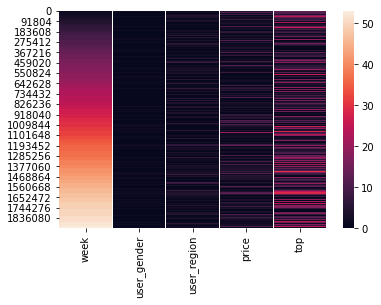

In [27]:
import seaborn as sns
sns.heatmap(re5)

In [37]:
# # df_X = re5.pivot("week","top","price")
# # ax = sns.heatmap(df_X)
# import matplotlib as plt
# pivot = re5.pivot(index='week', columns='top', values='price')
# ax = sns.heatmap(pivot, annot=True)
# plt.show()

In [23]:
re5

,week,user_gender,user_region,price,top
0,1,2,1,1,3
1,1,1,5,3,2
2,1,2,1,12,21
3,1,2,7,7,22
4,1,2,1,6,25
...,...,...,...,...,...
1927876,53,2,2,2,9
1927877,53,1,2,2,27
1927878,53,2,3,4,19
1927879,53,1,8,11,5


In [26]:
for k in range(1,100):
    n_clusters = k 
    print(n_clusters)
    kmeans_k = KMeans(n_clusters=n_clusters,random_state=42)
#     print(kmeans_k)
    c_k = kmeans_k.fit_predict(re5)
#     c_k=kmeans_k.fit_predict(re5)
    print(c_k)

1
[0 0 0 ... 0 0 0]
2
[0 0 0 ... 1 1 1]
3
[1 1 1 ... 0 0 0]
4
[1 1 1 ... 0 0 0]
5
[1 1 3 ... 0 2 2]
6
[1 1 1 ... 5 0 0]
7
[1 1 6 ... 5 0 0]
8
[0 0 5 ... 4 1 1]
9
[8 8 6 ... 0 3 3]
10
[9 9 5 ... 6 2 2]
11
[3 3 6 ... 0 7 7]
12
[ 7  7  6 ...  8 10  0]
13
[ 7  7  6 ...  8 10  0]
14
[ 7  7  6 ...  8 10  0]
15
[ 7  7  6 ...  8 10  0]
16
[ 2  2  7 ...  3 15  0]
17
[ 2  2  7 ...  3 15  0]
18
[ 7  7  6 ...  8 10  0]
19
[ 2  2  7 ... 16 18  0]
20
[12 12 14 ... 15  1  5]
21
[19 19  3 ...  0 12  4]
22
[19 19  3 ...  0 12  4]
23
[12 12  2 ...  8  1  9]
24
[12 12 23 ...  8  1  9]
25
[12 12 23 ... 24  1  9]
26
[12 12 23 ...  8  1  9]
27
[26 26 23 ...  8  1  9]
28
[19 19  3 ...  0 12  4]
29
[19 19  3 ...  0 12  4]
30
[ 9  9 22 ...  3 23  0]
31
[19 19  3 ...  0 12 29]
32
[ 9  9 22 ...  3 31 23]
33
[ 9  9 22 ...  3 31 23]
34
[ 9  9 22 ...  3 31 23]
35
[ 6  6 32 ...  0 18  9]
36
[26 26 23 ...  8  1  9]
37
[26 26 23 ...  8  1  9]
38
[26 26 23 ...  8  1  9]
39
[26 26 23 ... 38  1 25]
40
[26 26 23 ... 38  1

In [32]:
# for k in range(100):
#     c_k = kmeans_k.fit_predict(re5)
#     print(c_k)
import numpy
# a = numpy.asarray([ [1,2,3], [4,5,6], [7,8,9] ])
numpy.savetxt("/Users/karasu/Downloads/c_k.csv",c_k, delimiter=",")
# c_k.to_txt('/Users/karasu/Downloads/ck1.txt')

In [33]:
pd.DataFrame(c_k).to_csv('/Users/karasu/Downloads/ck.csv') 
# c #100

In [35]:
for k in range(1,100):
    n_clusters = k 
    print(n_clusters)
    kmeans_k = KMeans(n_clusters=n_clusters,random_state=42)
#     print(kmeans_k)
    c_k = kmeans_k.fit_predict(re5)
    kmeans_k.inertia_
#     c_k=kmeans_k.fit_predict(re5)
    print(kmeans_k.inertia_)

1
566564834.7145574
2
254917011.30262935
3
197401252.41924468
4
154659768.97158158
5
121119016.06843995
6
104826784.71927053
7
91539778.76913221
8
84141103.6548233
9
77754120.28475058
10
72638479.72002438
11
67642392.76555704
12
64390744.127639785
13
60877867.579548016
14
58177913.532154754
15
55832127.91843796
16
53331197.50373752
17
51063275.22793386
18
49105610.88442301
19
47657407.106088646
20
46206842.86480875
21
44987791.13937944
22
43674066.97228455
23
42503330.866516806
24
41320780.68420675
25
40369540.768538594
26
39459273.351984605
27
38525254.31483977
28
37674110.73297114
29
36829147.02522082
30
36393823.29295835
31
35659573.81247103
32
34960220.68245934
33
34541734.9433483
34
33936713.06697593
35
33400905.10216736
36
32851100.946509775
37
32438544.498555914
38
31788499.071216244
39
31384619.043254558
40
30979362.71991212
41
30612930.30136045
42
30182514.953946948
43
29742307.27432901
44
29222888.96350452
45
28955356.51818412
46
28467776.416276027
47
28057743.606052697
48
27

In [39]:
# pd.DataFrame(kmeans_k.inertia_).to_csv('/Users/karasu/Downloads/inertia_k.csv') 
# numpy.savetxt("/Users/karasu/Downloads/inertia_k.csv",kmeans_k.inertia_, delimiter=",")

In [51]:
inertia=pd.read_csv('/Users/karasu/Downloads/inertia_k.csv',header=None)

<AxesSubplot:>

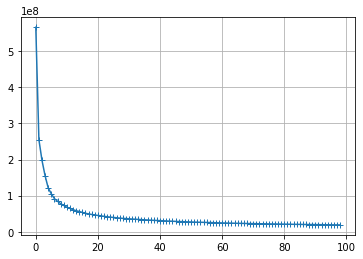

In [66]:
inertia.plot(kind='line',marker="+",grid=True,legend=False,x_compat=True)#figure_size=(10,10)

In [85]:
#weektop=week + top
test1= [re5['week'], re5['top']]
weektop = pd.concat(test1,axis=1)

### use kmeans to cluster week and top in range(1,50)

In [88]:
for k in range(1,50):
    n_clusters = k 
    print(n_clusters)
    kmeans_kt = KMeans(n_clusters=n_clusters,random_state=42)
    top_k = kmeans_kt.fit_predict(weektop)
    print(top_k)

1
[0 0 0 ... 0 0 0]
2
[0 0 0 ... 1 1 1]
3
[0 0 0 ... 1 1 1]
4
[1 1 1 ... 0 0 0]
5
[1 1 4 ... 2 0 0]
6
[4 4 4 ... 0 3 3]
7
[5 5 1 ... 0 2 2]
8
[7 7 3 ... 5 0 0]
9
[3 3 1 ... 4 2 2]
10
[5 5 6 ... 2 0 0]
11
[7 7 9 ... 8 0 0]
12
[7 7 9 ... 8 0 0]
13
[ 7  7 11 ...  3  0  0]
14
[ 7  7 11 ...  3  0  0]
15
[ 7  7 13 ...  3  0  0]
16
[ 0  0 10 ...  6 11 11]
17
[6 6 8 ... 0 7 7]
18
[ 5  5 17 ...  2  0  0]
19
[ 7  7 14 ...  0  9  9]
20
[ 4  4 14 ... 13 11 11]
21
[ 4  4  5 ...  0 12 12]
22
[ 0  0 12 ... 17  9  9]
23
[ 4  4  5 ...  0 12 12]
24
[ 4  4  5 ...  0 12 12]
25
[20 20 12 ... 18  4 17]
26
[ 4  4  5 ...  0 12 12]
27
[23 23 17 ...  8  1  1]
28
[17 17 12 ... 18 27 27]
29
[ 6  6 11 ... 27 20 20]
30
[ 6  6 19 ... 27 20 20]
31
[ 9  9 24 ...  8 12 12]
32
[ 9  9 24 ...  8 12 12]
33
[ 9  9 24 ...  8 12 12]
34
[11 11 16 ... 24  4  4]
35
[11 11 12 ... 24  4  4]
36
[11 11 12 ... 24  4  4]
37
[20 20 30 ... 31 27 27]
38
[ 9  9 24 ... 35 12 12]
39
[11 11 36 ... 24  4  4]
40
[ 9  9 38 ... 35 12 12]
41
[17 

In [99]:
## the value of inertia in k=range(1,50), data=week+top
for k in range(1,50):
    n_clusters = k 
    print(n_clusters)
    kmeans_kt = KMeans(n_clusters=n_clusters,random_state=42)
    top_k = kmeans_kt.fit_predict(weektop)
    kmeans_kt.inertia_
    print(kmeans_kt.inertia_)

1
538779391.588538
2
227164839.58052963
3
169678191.84820676
4
127151073.60222974
5
93613315.64484419
6
77311121.26535115
7
63953809.552553
8
56792539.99717134
9
50318031.99912757
10
45356751.61750028
11
40448572.093474135
12
36931898.94371054
13
34206579.09966567
14
31627546.298094664
15
29262445.436777446
16
27583695.322708156
17
26435473.685806636
18
24858136.134928674
19
23564146.359360483
20
22544122.988141805
21
21353719.32290351
22
20577152.94253771
23
19360624.292836647
24
18534037.913920574
25
17948674.124545727
26
17401789.508099884
27
16679931.16171491
28
16104871.501097102
29
15456323.080265122
30
14996802.538214317
31
14504807.002346037
32
13977348.246958805
33
13586133.280893326
34
13156041.979828361
35
12785949.59057714
36
12534078.530211875
37
12242887.067744669
38
11789164.524966048
39
11527190.04526923
40
11259968.406867474
41
10987406.585628727
42
10770378.181701584
43
10471300.650442932
44
10158790.074914413
45
9955683.383200362
46
9837127.688881349
47
9619541.63281

In [100]:
inertia_kt=pd.read_csv('/Users/karasu/Downloads/inertia_kt.csv',header=None)

<AxesSubplot:>

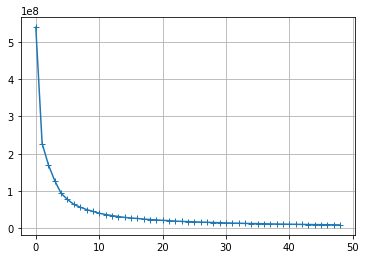

In [101]:
inertia_kt.plot(kind='line',marker="+",grid=True,legend=False,x_compat=True)#figure_size=(10,10)

In [128]:
# "elbow" in re5 of k=5
kmeans_model5 = KMeans(n_clusters=5)
clusters5 = kmeans_model5.fit_predict(r5)
# r5_new=r5.insert(r5.columns.get_loc("week"), "cluster", clusters5)

In [129]:
r5

,cluster,week,user_gender,user_age,user_region,price,top
0,2,1,2,2035,1,1,3
1,2,1,1,2035,5,3,2
2,1,1,2,2035,1,12,21
3,1,1,2,2035,7,7,22
4,1,1,2,2035,1,6,25
...,...,...,...,...,...,...,...
1927876,0,53,2,2035,2,2,9
1927877,4,53,1,2035,2,2,27
1927878,4,53,2,2035,3,4,19
1927879,0,53,1,2035,8,11,5


In [131]:
# "elbow" in weektop of k=7
kmeans_model7 = KMeans(n_clusters=7)
clusters = kmeans_model7.fit_predict(weektop) 
# weektop_new=weektop.insert(weektop.columns.get_loc("week"), "cluster", clusters)

In [132]:
weektop

,cluster,week,top
0,0,1,3
1,0,1,2
2,3,1,21
3,3,1,22
4,3,1,25
...,...,...,...
1927876,1,53,9
1927877,6,53,27
1927878,6,53,19
1927879,1,53,5


In [117]:
# genre = data5['genre_name_all']
# pd.DataFrame(genra).to_csv('/Users/karasu/Downloads/genre.csv') 